In [1]:
from tensorflow.keras.models import load_model

In [2]:
model = load_model('D:/FCI/graduation project/smart city/Machine Learning/Fire_Detection_Model.h5')

In [3]:
import glob

In [18]:
lst_fire_img = glob.glob('D:/FCI/graduation project/smart city/Machine Learning/fire and non fire images and videos/fire images/*.jpg')

In [19]:
print('Number of images with fire : {}'.format(len(lst_fire_img)))

Number of images with fire : 28


In [20]:
lst_fire_img

['D:/FCI/graduation project/smart city/Machine Learning/fire and non fire images and videos/fire images\\1-105.jpg',
 'D:/FCI/graduation project/smart city/Machine Learning/fire and non fire images and videos/fire images\\1372243989download.jpg',
 'D:/FCI/graduation project/smart city/Machine Learning/fire and non fire images and videos/fire images\\2021-637687233143593717-359.jpg',
 'D:/FCI/graduation project/smart city/Machine Learning/fire and non fire images and videos/fire images\\44480.jpg',
 'D:/FCI/graduation project/smart city/Machine Learning/fire and non fire images and videos/fire images\\44482.jpg',
 'D:/FCI/graduation project/smart city/Machine Learning/fire and non fire images and videos/fire images\\5df652cf421aa94577523f27-70b69182se5qsyr2mh80jlvaazxrwxd4emhprefii2z.jpg',
 'D:/FCI/graduation project/smart city/Machine Learning/fire and non fire images and videos/fire images\\9998980168.jpg',
 'D:/FCI/graduation project/smart city/Machine Learning/fire and non fire imag

In [21]:
import random

In [22]:
lst_fire = []
for x in lst_fire_img:
    lst_fire.append([x,1])

random.shuffle(lst_fire)

In [23]:
import pandas as pd

In [24]:
df = pd.DataFrame(lst_fire,columns = ['files','target'])
df

,files,target
0,D:/FCI/graduation project/smart city/Machine L...,1
1,D:/FCI/graduation project/smart city/Machine L...,1
2,D:/FCI/graduation project/smart city/Machine L...,1
3,D:/FCI/graduation project/smart city/Machine L...,1
4,D:/FCI/graduation project/smart city/Machine L...,1
5,D:/FCI/graduation project/smart city/Machine L...,1
6,D:/FCI/graduation project/smart city/Machine L...,1
7,D:/FCI/graduation project/smart city/Machine L...,1
8,D:/FCI/graduation project/smart city/Machine L...,1
9,D:/FCI/graduation project/smart city/Machine L...,1


In [25]:
df.iloc[12]

files     D:/FCI/graduation project/smart city/Machine L...
target                                                    1
Name: 12, dtype: object

In [26]:
import cv2

In [27]:
def preprocessing_image(filepath):
    img = cv2.imread(filepath) #read
    if img is None:
        print("Error: Could not load image")
    img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR) #convert
    img = cv2.resize(img,(196,196))  # resize
    img = img / 255 #scale
    return img

In [28]:
import numpy as np

In [29]:
def create_format_dataset(dataframe):
    X = []
    y = []
    i=0
    for f,t in dataframe.values:
        i+=1
        print(i)
        X.append(preprocessing_image(f))
        y.append(t)

    return np.array(X),np.array(y)

In [30]:
X, y = create_format_dataset(df)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28


In [31]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [32]:
print(X.shape)
print(y.shape)

(28, 196, 196, 3)
(28,)


In [33]:
y_pred = model.predict(X)

1/1 [==============================] - 1s 1s/step


In [34]:
y_pred = y_pred > 0.5

In [35]:
y_pred

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report

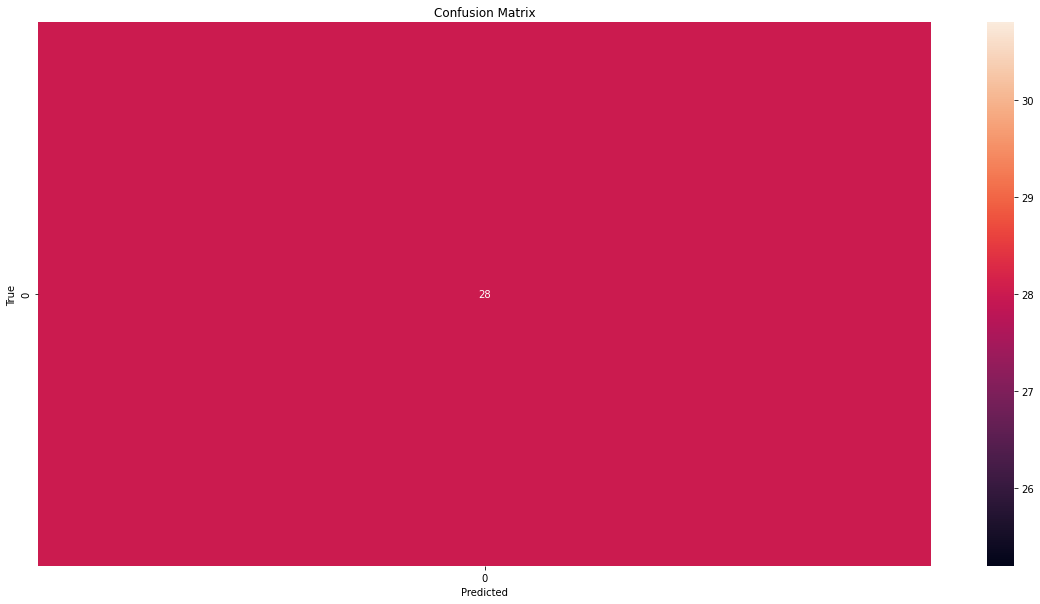

In [37]:
plt.figure(figsize = (20,10))

sns.heatmap(confusion_matrix(y,y_pred),annot = True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")

plt.show()

In [38]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        28

    accuracy                           1.00        28
   macro avg       1.00      1.00      1.00        28
weighted avg       1.00      1.00      1.00        28

